# 0.0 Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/Clean_data.csv')
uncleaned_data = pd.read_csv('./Data/Immoweb_scraping_result.csv')
df.dtypes

Unnamed: 0                            int64
id                                    int64
Locality                              int64
Type of property                     object
Subtype of property                  object
Type of sale                         object
Fully equipped kitchen                int64
Fireplace                             int64
Terrace                               int64
Garden                                int64
Garden area                         float64
Surface of the land                 float64
Surface area of the plot of land    float64
Swimming pool                         int64
State of the building                object
Compound Listing                     object
Price                               float64
Number of rooms                     float64
Living Area                         float64
Furnished                           float64
Terrace area                        float64
Number of facades                   float64
dtype: object

# 2.6.1 : How many qualitative and quantitative variables are there?

The columns are considered quantitative if they are assigned a value from a discrete set. For example 'Locality' is a categorical variable because every entry comes from a discrete (finite) set of codes.

In [3]:
# How many quantitavie and qualitative variables are there?
quantitative_columns = ['Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Garden area', 'Surface of the land'\
                       , 'Surface area of the plot of land', 'Number of facades']
qualitative_columns = ['id', 'Locality', 'Type of property', 'Subtype of property', 'Type of sale', 'Fully equipped kitchen', 'Furnished',\
                       'Fireplace', 'Terrace', 'Garden', 'Swimming pool', 'State of the building', 'Compound Listing']

print(f'The dataset contains a total of {len(df.columns)} columns and {df.shape[0]} rows.')
print(f'Out of the {len(df.columns)} columns {len(quantitative_columns)} are quantitative variables.')
print(f'Out of the {len(df.columns)} columns {len(qualitative_columns)} are qualitative variables.')

The dataset contains a total of 22 columns and 10997 rows.
Out of the 22 columns 8 are quantitative variables.
Out of the 22 columns 13 are qualitative variables.


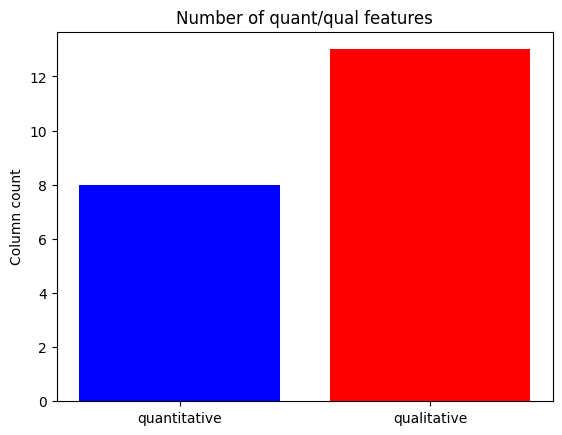

In [4]:
variables = ['quantitative', 'qualitative']
counts = [len(quantitative_columns), len(qualitative_columns)]
fig, ax = plt.subplots()
ax.bar(variables, counts, color=['blue', 'red'])
ax.set_ylabel('Column count')
ax.set_title('Number of quant/qual features')
plt.show()

# 2.6.2 How would you transform these values into numerical values?

There are two popular ways of doing this: using an ordinal encoding, and using a one-hot encoding. Ordinal encoding assigns a unique integer to every category. One hot encoding creates a binary feature for every category. Both have their advantages and disadvantages:

- One hot encoding creates extra features making any model fitting more expensive.
- Oridnal encoding can suffer a small accuracy loss in shallow models.

Some columns in the dataset have already been transformed during cleaning, or some categorical columns (like 'id' or 'Locality') are already in integer form.

In [5]:
def ordinalEncode(entry, categories):
    for index, category in enumerate(categories):
        if entry == category:
            return index

In [6]:
# Column of the categorical variables that need to be encoded
columns_to_be_encoded = ['Type of property', 'Subtype of property', 'Type of sale', 'State of the building', 'Compound Listing']

# Make dataframe with odrinal encoding
df1 = df.copy()
for column in columns_to_be_encoded:
    df1[column] = df[column].apply(lambda el: ordinalEncode(el, df[column].unique()))

# Make dataframe with one-hot encoding
df2 = df.copy()
for column in columns_to_be_encoded:
    dummy_data = pd.get_dummies(df[column])
    df2 = pd.concat([df2, dummy_data], axis=1)
df2.drop(columns_to_be_encoded, axis=1, inplace=True)
df2.shape

(10997, 51)

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

HYPERPARAMS = {'hidden_layer_sizes': (20,), 'alpha': 1e-5, 'max_iter': 10000, 'random_state': 1, 'activation': 'relu'\
              ,'early_stopping': False}

# Prepare dataset that uses oridinal encoding
data = df1
X = data[[col for col in data.columns if col != 'Price']] #Price will be the target variable
Y = data['Price']
print("Shape of train and test data: ", X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)


# Train model on data encoded using ordinalEncoding
model = MLPRegressor(**HYPERPARAMS).fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Score of a model where the data is using ordinalEncode: ", score)

# Prepare dataset that uses oridinal encoding
data = df2
X = data[[col for col in data.columns if col != 'Price']] #Price will be the target variable
Y = data['Price']
print("Shape of train and test data: ", X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# Train model on data encoded using onehotEncoding
model = MLPRegressor(**HYPERPARAMS).fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Score of a model where the data is using onehotEncode: ", score)

Shape of train and test data:  (10997, 21) (10997,)
Score of a model where the data is using ordinalEncode:  -0.0631987998904271
Shape of train and test data:  (10997, 54) (10997,)
Score of a model where the data is using onehotEncode:  -0.09126125051436507


# 2.7 What is the percentage of missing values per column?

In [8]:
missing_quantitative = []
missing_quantitative_columns = []
missing_qualitative = []
missing_qualitative_columns = []
print('Percentage of missing data per column: ')
for column in quantitative_columns:
  percentage = (uncleaned_data[column].isna().sum() / uncleaned_data[column].shape[0] ) * 100
  if percentage > 0: 
      missing_quantitative.append(percentage)
      missing_quantitative_columns.append(column)
  print(column, ': ', percentage, '%')
for column in qualitative_columns:
  percentage = (uncleaned_data[column].isna().sum() / uncleaned_data[column].shape[0] ) * 100
  if percentage > 0: 
      missing_qualitative.append(percentage)
      missing_qualitative_columns.append(column)
  print(column, ': ', percentage, '%')


Percentage of missing data per column: 
Price :  0.0 %
Number of rooms :  0.0 %
Living Area :  1.4243361691157514 %
Terrace area :  40.64836298014952 %
Garden area :  80.78112915699923 %
Surface of the land :  80.78112915699923 %
Surface area of the plot of land :  68.92240268110338 %
Number of facades :  34.83500902294406 %
id :  0.0 %
Locality :  0.0 %
Type of property :  0.0 %
Subtype of property :  0.0 %
Type of sale :  0.0 %
Fully equipped kitchen :  29.666151069863368 %
Furnished :  53.06780097963393 %
Fireplace :  0.0 %
Terrace :  22.65403454498582 %
Garden :  80.78112915699923 %
Swimming pool :  62.52255736014437 %
State of the building :  23.272750708945605 %
Compound Listing :  0.0 %


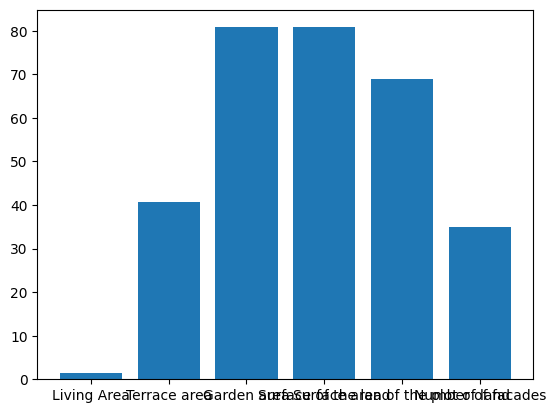

In [9]:
#Plotting percentage of missing data per colulmn for categoricals
fig1, ax1 = plt.subplots()
bar_labels = missing_quantitative_columns
ax1.bar(missing_quantitative_columns, missing_quantitative, label=bar_labels)
plt.show()

# TODO fix plot and produce plot for qualitative data

# 3.5/3.8 What are the most/least expensive municipalities in Belgium?

In [38]:
import geopandas as gpd
geographic_df = gpd.read_file('./Data/geodata/3812/postaldistricts.shp')
geographic_df.rename(columns={'nouveau_PO': 'Locality'}, inplace=True)
geographic_df['Locality'] = localities['Locality'].astype('int64')
geographic_df.shape

(1268, 7)

<Axes: >

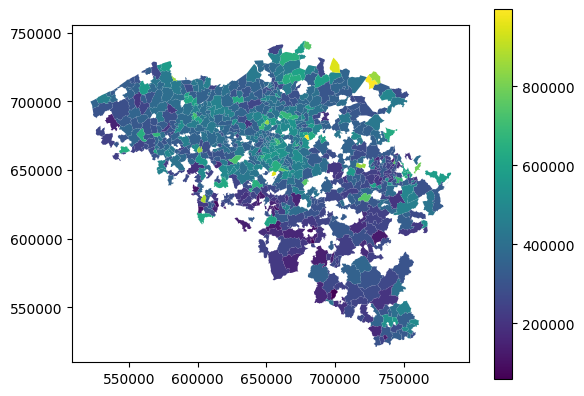

In [34]:
avg_locality_price = df.groupby('Locality')['Price'].mean()
avg_locality_price_df = pd.DataFrame({'Locality': avg_locality_price.index, 'AveragePrice': avg_locality_price.values})
avg_prices_belgium = geographic_df.merge(avg_locality_price_df, on='Locality', how='left')
avg_prices_belgium.plot('AveragePrice', legend=True)

# 3.6/3.9 What are the most/least expensive municipalities in Flanders?

<Axes: >

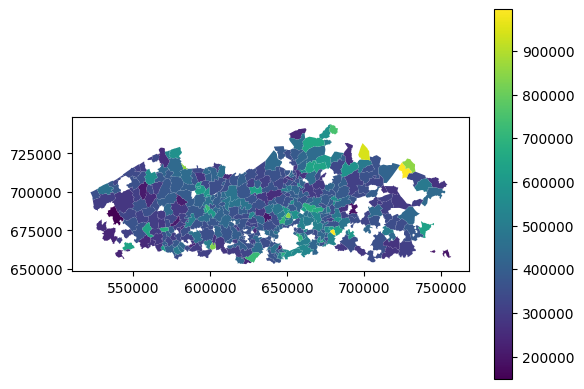

In [39]:
locality_codes_flanders = [code for code in range(2000, 3000)] + [code for code in range(9000, 10000)]\
                        + [code for code in range(1500, 2000)] + [code for code in range(3000, 4000)]\
                        + [code for code in range(8000, 9000)]

avg_prices_flanders = avg_prices_belgium[avg_prices_belgium['Locality'].isin(locality_codes_flanders)]
avg_prices_flanders.plot('AveragePrice', legend=True)

# 3.7/3.10 What are the most/least expensive municipalities in Wallonia?

<Axes: >

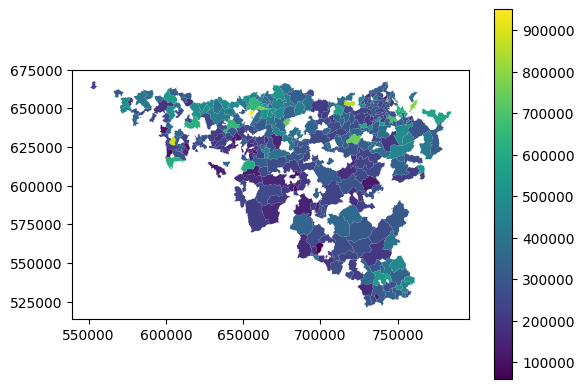

In [40]:
locality_codes_wallonia = [code for code in range(7000, 8000)] + [code for code in range(6000, 7000)]\
                        + [code for code in range(4000, 5000)] + [code for code in range(5000, 6000)]\
                        + [code for code in range(1300, 1500)]

avg_prices_wallonia = avg_prices_belgium[avg_prices_belgium['Locality'].isin(locality_codes_wallonia)]
avg_prices_wallonia.plot('AveragePrice', legend=True)